The process of estimating the parameters of a camera is called camera calibration.

This means we have all information (parameters or coeffients) about the camera required to determine an accurate 
relationship between a 3D point in the real world and its corresponding 2D projection (pixel) in the image captured by 
that calibrated camera.

1. Internal parameters of the camera/lens system. E.g., focal length, optical center, and radial distortion 
coefficients the center.

2. External parameters: This refers to the orientation (rotation and translation) of the camera with respect to some 
world coordinate system.

In [1]:
# import necessary packages
import matplotlib.pyplot as plt
import cv2
import numpy as np

# 角点的个数以及棋盘格间距
XX = 11 #标定板的中长度对应的角点的个数
YY = 8  #标定板的中宽度对应的角点的个数
CHECKERBOARD = (XX, YY)
image_path = "../../data/sample_data/camera_calib/data1/chessboard_01.png"
# Creating vector to store vectors of 3D points for each checkboard image
objpoints = []
# Creating vector to store vectors of 2D points for each checkerboard image
imgpoints = []

In [2]:
"""
Step 1: Find the chess board corners
If desired number of corners are found in the image then ret = true
"""
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH+cv2.CALIB_CB_FAST_CHECK
                                         +cv2.CALIB_CB_NORMALIZE_IMAGE)
# corners: order in row by row, and left to right in each row

In [3]:
corners

array([[[342.9274 , 149.01721]],

       [[407.9579 , 155.13004]],

       [[469.7181 , 162.46875]],

       [[529.164  , 167.41689]],

       [[585.8306 , 173.25873]],

       [[638.78076, 179.0172 ]],

       [[690.22076, 184.54736]],

       [[738.66705, 190.01398]],

       [[785.27014, 195.61992]],

       [[829.1941 , 200.08087]],

       [[871.7226 , 204.76413]],

       [[340.92407, 210.37941]],

       [[406.2138 , 216.20546]],

       [[468.54156, 220.18298]],

       [[527.51715, 225.21582]],

       [[583.8938 , 229.20901]],

       [[637.6601 , 233.46257]],

       [[688.47754, 237.93834]],

       [[737.65063, 241.73933]],

       [[783.35803, 245.39941]],

       [[828.36505, 249.38531]],

       [[870.2907 , 253.63907]],

       [[339.18405, 272.6795 ]],

       [[404.85037, 275.29257]],

       [[466.5503 , 279.71255]],

       [[525.528  , 281.57336]],

       [[582.1984 , 285.40567]],

       [[635.9661 , 288.09686]],

       [[687.5326 , 291.33466]],

       [[735.5

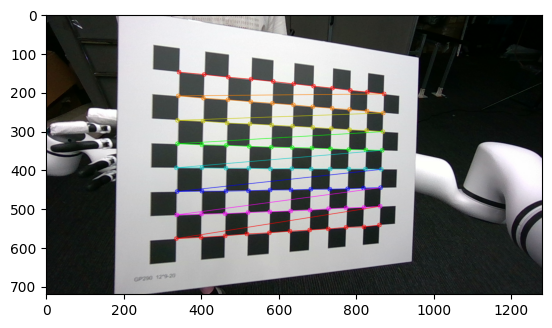

In [4]:
img_draw = cv2.drawChessboardCorners(img.copy(), CHECKERBOARD, corners, ret)
plt.imshow(cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB))
# plt.scatter(corners[:, 0, 0], corners[:, 0, 1])

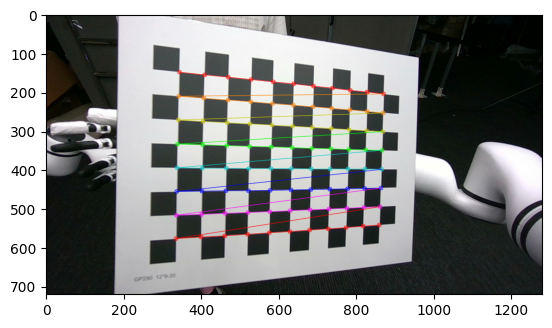

In [5]:
"""
Step 2: Refine corners
If desired number of corners are detected, we refine the pixel coordinates and display them on the images of 
checkerboard"""
if ret:
    # 设置寻找亚像素角点的参数，采用的停止准则是最大循环次数30和最大误差容限0.001
    criteria = (cv2.TERM_CRITERIA_MAX_ITER | cv2.TERM_CRITERIA_EPS, 30, 0.001)
    # refining pixel coordinates for given 2d points
    corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
    
    imgpoints.append(corners2)
    
    # draw ad display the corner
    img_draw = cv2.drawChessboardCorners(img.copy(), CHECKERBOARD, corners2, ret)
    
    plt.imshow(cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB))
    # plt.scatter(corners2[:, 0, 0], corners2[:, 0, 1])

In [6]:
"""Step 3: Set up world coordinate and got corresponding 3D points."""
L = 0.03 #标定板一格的长度  单位为米
# 获取标定板角点的位置
objp = np.zeros((XX * YY, 3), np.float32)
objp[:, :2] = np.mgrid[0:XX, 0:YY].T.reshape(-1, 2)     # 将世界坐标系建在标定板上，所有点的Z坐标全部为0，所以只需要赋值x和y
# Take the first corner as origin of world coordinate
objp *= L
if ret:
    objpoints.append(objp)
objp

array([[0.        , 0.        , 0.        ],
       [0.03      , 0.        , 0.        ],
       [0.06      , 0.        , 0.        ],
       [0.09      , 0.        , 0.        ],
       [0.12      , 0.        , 0.        ],
       [0.14999999, 0.        , 0.        ],
       [0.17999999, 0.        , 0.        ],
       [0.21      , 0.        , 0.        ],
       [0.24      , 0.        , 0.        ],
       [0.26999998, 0.        , 0.        ],
       [0.29999998, 0.        , 0.        ],
       [0.        , 0.03      , 0.        ],
       [0.03      , 0.03      , 0.        ],
       [0.06      , 0.03      , 0.        ],
       [0.09      , 0.03      , 0.        ],
       [0.12      , 0.03      , 0.        ],
       [0.14999999, 0.03      , 0.        ],
       [0.17999999, 0.03      , 0.        ],
       [0.21      , 0.03      , 0.        ],
       [0.24      , 0.03      , 0.        ],
       [0.26999998, 0.03      , 0.        ],
       [0.29999998, 0.03      , 0.        ],
       [0.

In [7]:
np.array(objpoints).shape

(1, 88, 3)

In [8]:
np.array(imgpoints).shape

(1, 88, 1, 2)

In [9]:
"""
Step 4: Performing camera calibration by passing the value of known 3D point(objpoints) and corresponding pixel coordinates 
of the detected corners(imgpoints)"""
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [10]:
f'Camera matrix: {mtx}' # 内参数矩阵

'Camera matrix: [[553.1356242    0.         628.0592179 ]\n [  0.         555.71653879 360.56834152]\n [  0.           0.           1.        ]]'

In [11]:
f'Dist coeffs: {dist}' # 畸变系数 distortion cofficients = (k_1,k_2,p_1,p_2,k_3)


'Dist coeffs: [[-0.03971523  0.03536306 -0.00071591  0.00034525 -0.00140486]]'

In [12]:
# We can also calcuate rvecs, tvecs by cv2.solvePnP if camera intrinsic already know.
ret, rvec, tvec = cv2.solvePnP(objp, corners, mtx, dist)

In [13]:
f"R_target2cam: {rvecs[0]*180/np.pi}" # degree

'R_target2cam: [[  0.93074886]\n [-14.25600656]\n [  1.41751667]]'

In [14]:
f"t_target2cam: {tvecs[0]}" # meter

't_target2cam: [[-0.13922786]\n [-0.10298111]\n [ 0.26776368]]'

## Re-projection Error
Ref: https://docs.opencv.org/4.x/dc/dbb/tutorial_py_calibration.html

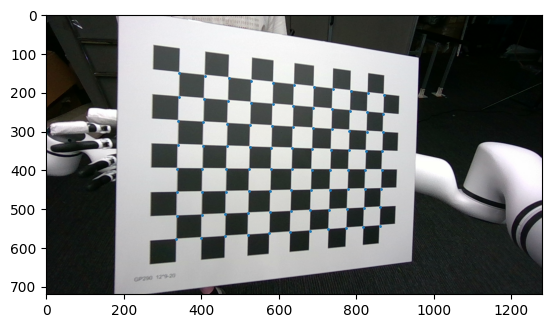

In [15]:
prjpoints, _ = cv2.projectPoints(objpoints[0], rvecs[0], tvecs[0], mtx, dist)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.scatter(prjpoints[:, :, 0], prjpoints[:, :, 1], s=1)

In [16]:
error = cv2.norm(corners2, prjpoints, cv2.NORM_L2)/len(prjpoints)
print(f"error: {error}")

error: 0.00547491175319994
